In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate
from numba import jit, njit

In [237]:
filename='E_440nA.csv'
E_data = np.genfromtxt(filename, delimiter=',')
E=E_data[:,0]
r=E_data[:,1] *1e-6  #convert micrometer to meter
cutoff=300 *1e-6  #convert micrometer to meter

Text(10000.0, 2e-05, 'Approximate acceleration region')

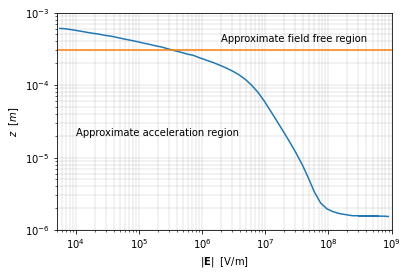

In [226]:
plt.loglog(E,r)
plt.loglog([1e3,1e9],[cutoff,cutoff])
plt.xlim([5*1e3, 1e9])
plt.ylim([1e-6, 1e-3])
plt.xlabel("$|\mathbf{E}|$  [V/m]")
plt.ylabel("$z$  [$m$]")
plt.grid(color='k',linewidth=0.1, which="both")

plt.text(2e6, 400e-6, 'Approximate field free region', fontsize = 10)
plt.text(1e4, 20e-6, 'Approximate acceleration region', fontsize = 10)

(1e-06, 0.001)

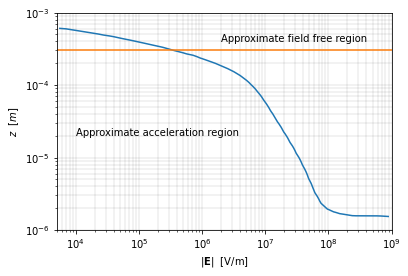

In [227]:
f = interpolate.interp1d(E, r)
Enew=np.logspace(np.log(E[0])/np.log(10), np.log(E[-1]+0.01)/np.log(10), num=5*len(E), endpoint=True)
rnew = f(Enew)   # use interpolation function returned by `interp1d`
#plt.loglog(E, r, 'o')
plt.loglog(Enew, rnew)
plt.xlabel("$|\mathbf{E}|$  [V/m]")
plt.ylabel("$z$  [$m$]")
plt.grid(color='k',linewidth=0.1, which="both")
plt.loglog([1e3,1e9],[cutoff,cutoff])
plt.text(2e6, 400e-6, 'Approximate field free region', fontsize = 10)
plt.text(1e4, 20e-6, 'Approximate acceleration region', fontsize = 10)

plt.xlim([5*1e3, 1e9])
plt.ylim([1e-6, 1e-3])

In [228]:
x1=1.7e-6 ; x2=120e-6

r1=rnew[rnew<=x1] ; E1=Enew[rnew<=x1]

r2=rnew[np.where(np.logical_and(rnew>x1, rnew<=x2))] 
E2=Enew[np.where(np.logical_and(rnew>x1, rnew<=x2))]

r3=rnew[np.where(np.logical_and(rnew>x2, rnew<=cutoff))] 
E3=Enew[np.where(np.logical_and(rnew>x2, rnew<=cutoff))]

logr = np.log(r1); logE = np.log(E1)
coeffs1 = np.polyfit(logr,logE,deg=1) ;poly1 = np.poly1d(coeffs1)
yfit1 = lambda x: np.exp(poly1(np.log(x)))

logr = np.log(r2); logE = np.log(E2)
coeffs2 = np.polyfit(logr,logE,deg=1) ;poly2 = np.poly1d(coeffs2)
yfit2 = lambda x: np.exp(poly2(np.log(x)))

logr = np.log(r3); logE = np.log(E3)
coeffs3 = np.polyfit(logr,logE,deg=1) ;poly3 = np.poly1d(coeffs3)
yfit3 = lambda x: np.exp(poly3(np.log(x)))

Text(600, 50000.0, 'Approximate field free region')

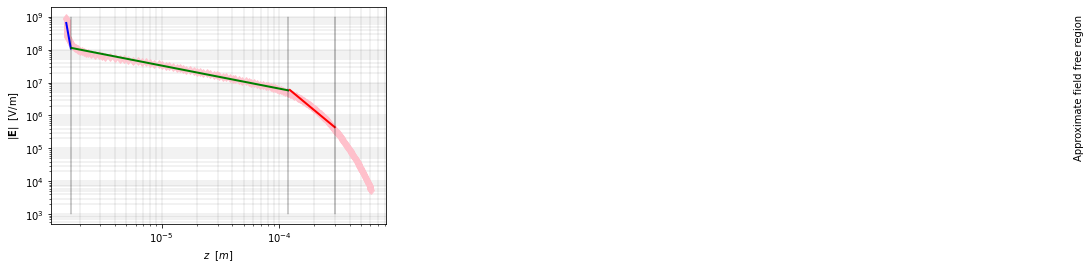

In [229]:
plt.loglog(rnew,Enew,'d',color="pink",alpha=0.8)
plt.loglog(r1,yfit1(r1),'b',linewidth=2)
plt.loglog(r2,yfit2(r2),'g',linewidth=2)
plt.loglog(r3,yfit3(r3),'r',linewidth=2)
plt.xlabel("$z$  [$m$]")
plt.ylabel("$|\mathbf{E}|$  [V/m]")
plt.grid(color='k',linewidth=0.1, which="both")
plt.plot([x1,x1],[1e3,1e9],color='k',linewidth=0.4)
plt.plot([x2,x2],[1e3,1e9],'k',linewidth=0.4)
plt.plot([cutoff,cutoff],[1e3,1e9],'k',linewidth=0.4)
plt.text(600, 5e4, 'Approximate field free region',rotation=90, fontsize = 10)

In [230]:
def fit_Enorm(filename,x1,x2,cutoff):
    E_data = np.genfromtxt(filename, delimiter=',')
    E=E_data[:,0]
    r=E_data[:,1]
    
    r1=r[r<=x1] ; E1=E[r<=x1]

    r2=r[np.where(np.logical_and(r>x1, r<=x2))] 
    E2=E[np.where(np.logical_and(r>x1, r<=x2))]

    r3=r[np.where(np.logical_and(r>x2, r<=cutoff))] 
    E3=E[np.where(np.logical_and(r>x2, r<=cutoff))]

    logr = np.log(r1); logE = np.log(E1)
    coeffs1 = np.polyfit(logr,logE,deg=1) ;poly1 = np.poly1d(coeffs1)
    yfit1 = lambda x: np.exp(poly1(np.log(x)))

    logr = np.log(r2); logE = np.log(E2)
    coeffs2 = np.polyfit(logr,logE,deg=1) ;poly2 = np.poly1d(coeffs2)
    yfit2 = lambda x: np.exp(poly2(np.log(x)))

    logr = np.log(r3); logE = np.log(E3)
    coeffs3 = np.polyfit(logr,logE,deg=1) ;poly3 = np.poly1d(coeffs3)
    yfit3 = lambda x: np.exp(poly3(np.log(x)))
    
    return yfit1,yfit2,yfit3
    



def E_at_r(r0,x1,x2,cutoff,yfit1,yfit2,yfit3):
    if r0<=x1:
        return yfit1(r0)
    elif r0>x1 and r0<=x2:
        return yfit2(r0)
    elif r0>x2 and r0<=cutoff:
        return yfit3(r0)
    else:
        return 0
    


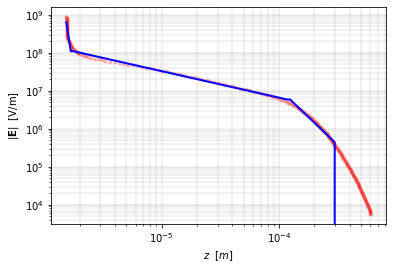

In [231]:
E_at_vec = np.vectorize(E_at_r)
Efit= E_at_vec(rnew,x1,x2,cutoff,yfit1,yfit2,yfit3)
plt.loglog(rnew,Enew,'r.',linewidth=1,alpha=0.2)
plt.loglog(rnew,Efit,'b',linewidth=2)
plt.xlabel("$z$  [$m$]")
plt.ylabel("$|\mathbf{E}|$  [V/m]")
plt.grid(color='k',linewidth=0.1, which="both")

In [238]:
def fit_E(E,r,regions):
    
    x1=regions[1] ;  x2=regions[2]  ;  cutoff=regions[3]
    
    r1=r[r<=x1] ; E1=E[r<=x1]

    r2=r[np.where(np.logical_and(r>x1, r<=x2))] 
    E2=E[np.where(np.logical_and(r>x1, r<=x2))]

    r3=r[np.where(np.logical_and(r>x2, r<=cutoff))] 
    E3=E[np.where(np.logical_and(r>x2, r<=cutoff))]

    logr = np.log(r1); logE = np.log(E1)
    coeffs1 = np.polyfit(logr,logE,deg=1) 

    logr = np.log(r2); logE = np.log(E2)
    coeffs2 = np.polyfit(logr,logE,deg=1) 
  

    logr = np.log(r3); logE = np.log(E3)
    coeffs3 = np.polyfit(logr,logE,deg=1)
    
    Coeffs=np.zeros((3,2))
    Coeffs[0,:]=coeffs1
    Coeffs[1,:]=coeffs2
    Coeffs[2,:]=coeffs3
    
    return Coeffs



def E_of_r(r0,regions,Coeffs):
    xmin=regions[0] ; x1=regions[1] ;  x2=regions[2]  ;  cutoff=regions[3]
    coeffs1=Coeffs[0,:] ; coeffs2=Coeffs[1,:] ;  coeffs3=Coeffs[2,:]
    
    if  r0<xmin and r0<=x1:
        return np.exp(coeffs1[0]*np.log(r0)+coeffs1[1])
    elif r0>x1 and r0<=x2:
        return np.exp(coeffs2[0]*np.log(r0)+coeffs2[1])
    elif r0>x2 and r0<=cutoff:
        return np.exp(coeffs3[0]*np.log(r0)+coeffs3[1])
    else:
        return 0



In [240]:
xmin=min(r);x1=1.7 ; x2=120; cutoff=300
regions=np.array((min(r),x1,x2,cutoff))*1e-6
Coeffs = fit_E(E,r,regions)
rextra=np.concatenate((np.array([1,1.1,1.2,1.3,1.4,1.5]), r))
EE=np.zeros(len(r))
for i in range(len(r)):
    EE[i]= E_of_r(r[i],regions,Coeffs)

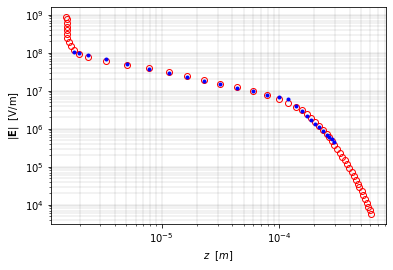

In [242]:
plt.loglog(r,E,'o', markerfacecolor='none',markeredgecolor='red')
plt.loglog(r,EE,'b.',linewidth=2)
plt.xlabel("$z$  [$m$]")
plt.ylabel("$|\mathbf{E}|$  [V/m]")
plt.grid(color='k',linewidth=0.1, which="both")